# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [157]:
import numpy as np
from scipy import optimize
import sympy as sp
from sympy import symbols, Eq, solve
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
import modelproject
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

\begin{align}
y_t - \bar{y} &= \beta_1 \left( e_{t-1}^{r} + \pi^{f} - \pi_t \right) - \beta_2 \left( i^{f} - \pi_{t+1}^{e} - r^{f} \right) + \tilde{z_t}, \quad \text{(1)}\\
where   \tilde{z_t} &\equiv \beta_3 \left( g_t - \bar{g} \right)\\
    g_t - \bar{g} &= a \left( \bar{y} - y_t \right), \quad \text{(2)}\\
    \pi_t &= \pi_t^{e} + \gamma \left( y_t - \bar{y} \right) + s_t, \quad \text{(3)}\\
    e_{t}^{r} &= e_{t-1}^{r} + \pi^{f} - \pi_t, \quad \text{(4)}
\end{align}

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

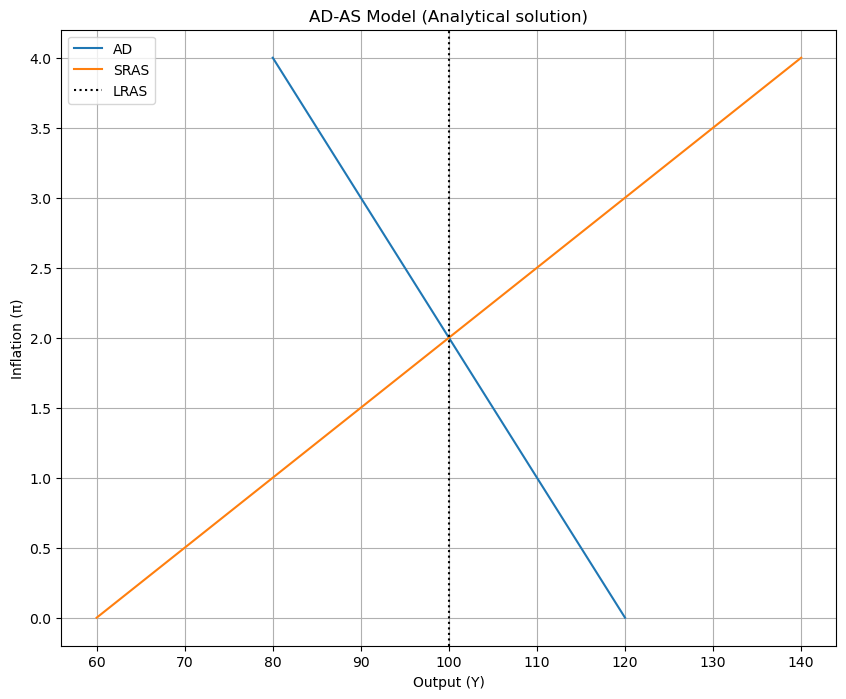

In [158]:
# Import the ADASModel class from the modelproject.py file


# Create an instance of the ADASModel class with the desired parameters
model = modelproject.ADASModel(
    beta1=10, beta2=1, beta3=0.1, gamma=0.05, a=0.2, expected_inflation=2, foreign_inflation=0,
    foreign_interest_rate=2, foreign_real_interest_rate=2, previous_exchange_rate=2, potential_output=100,
    supply_shock=0
)

# Find the intersection point analytically
intersection_analytical = model.optimize_parameters(None, method='analytical')

# Plot the graph
model.plot_graph()



## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

Intersection Point (Numerical): [100.   2.]


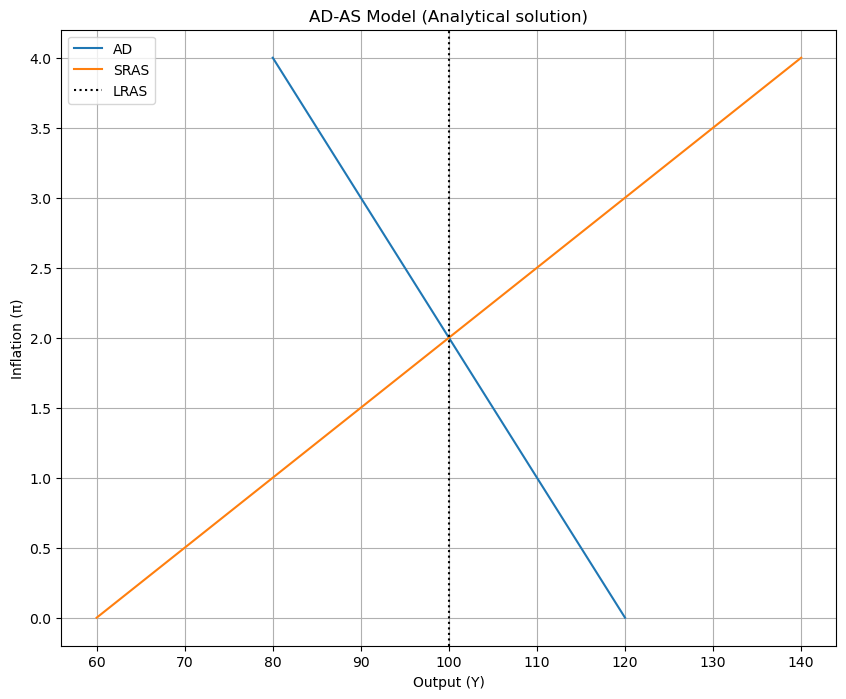

In [159]:


# Create an instance of the ADASModel class with the desired parameters
model = modelproject.ADASModel(
    beta1=10, beta2=1, beta3=0.1, gamma=0.05, a=0.2, expected_inflation=2, foreign_inflation=0,
    foreign_interest_rate=2, foreign_real_interest_rate=2, previous_exchange_rate=2, potential_output=100,
    supply_shock=0
)

# Find only the numerical intersection point
initial_guess = [100, 2]
intersection_numerical = model.optimize_parameters(initial_guess, method='numerical')

# Plot the graph
model.plot_graph()


# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 